In [360]:
# pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from scipy.stats import contingency
from wordcloud import WordCloud, STOPWORDS
from datetime import datetime


In [15]:
yt = pd.read_csv("youtubers.csv")#.drop(yt.columns[0], axis = 1)


In [16]:
yt = yt.drop([yt.columns[0], yt.columns[-1]],axis = 1)

yt.head()

,youtuber,channel_id,sex,sub_count,num_views,num_vids
0,MrBeast Gaming,UCIPPMRA040LQr5QPyJEbmXA,M,36400000,6376172328,141
1,Markiplier,UC7_YxT-KID8kRbqZo7MyscQ,M,35200000,20307840565,5489
2,jacksepticeye,UCYzPXprvl5Y-Sf0g4vX-m6g,M,30100000,16260045289,5115
3,Techno Gamerz,UCX8pnu3DYUnx8qy8V_c6oHg,M,34500000,9748446428,944
4,Dream,UCTkXRDQl0luXxVQrRQvWS6w,M,31800000,2934067160,116


In [17]:
yt['youtuber'] = yt.get("youtuber").apply(str.lower)

In [18]:
yt.head()

,youtuber,channel_id,sex,sub_count,num_views,num_vids
0,mrbeast gaming,UCIPPMRA040LQr5QPyJEbmXA,M,36400000,6376172328,141
1,markiplier,UC7_YxT-KID8kRbqZo7MyscQ,M,35200000,20307840565,5489
2,jacksepticeye,UCYzPXprvl5Y-Sf0g4vX-m6g,M,30100000,16260045289,5115
3,techno gamerz,UCX8pnu3DYUnx8qy8V_c6oHg,M,34500000,9748446428,944
4,dream,UCTkXRDQl0luXxVQrRQvWS6w,M,31800000,2934067160,116


In [19]:
sex_only = yt[['youtuber', 'sex']]
# sex_only['youtuber'] = sex_only.get('youtuber').apply(str.lower)

sex_only

,youtuber,sex
0,mrbeast gaming,M
1,markiplier,M
2,jacksepticeye,M
3,techno gamerz,M
4,dream,M
5,dantdm,M
6,ninja,M
7,theradbrad,M
8,gamegrumps,M
9,coryxkenshin,M


In [20]:
len(set(sex_only.get("youtuber").values))

27

In [22]:
# df.groupby("Youtuber").count()

In [23]:
set(sex_only.get('youtuber').values)

{'alliebeemac',
 'cookieswirlc',
 'coryxkenshin',
 'dantdm',
 'dexbonus',
 'dream',
 'gamegrumps',
 'gamergirl',
 'gamingwithjen',
 'georgenotfound',
 'ihascupquake',
 'itsfunneh',
 'jacksepticeye',
 'jazzyguns',
 'kittykatgaming',
 'ldshadowlady',
 'markiplier',
 'megmage',
 'mrbeast gaming',
 'niki nihachu',
 'ninja',
 'sqaishey quack',
 'stacyplays',
 'techno gamerz',
 'technoblade',
 'theradbrad',
 'tommyinnit'}

In [25]:
# set(df.get('Youtuber').values)

In [28]:
df = pd.read_csv("yt_emotions_1.csv")
df = df.drop(df.columns[0], axis = 1)
df['Youtuber'] = df.get('Youtuber').apply(str.lower)
df.shape

(6814, 6)

In [29]:
df = df[df.get('Youtuber')!= 'youtuber']

In [30]:
df.head()

,Youtuber,Comments,Word Count,Char Length,Polarity Scores,Emotion
0,mrbeast gaming,subscribe i’ll put raining arrows minecraft se...,7,50,"{'roberta_neg': 0.043050993, 'roberta_neu': 0....",1
1,mrbeast gaming,jimmy raging possibly one scariest things i’ve...,13,81,"{'roberta_neg': 0.72986925, 'roberta_neu': 0.2...",0
2,mrbeast gaming,like video jimmy laughing everyone else,6,39,"{'roberta_neg': 0.048514094, 'roberta_neu': 0....",1
3,mrbeast gaming,like chandler waits start let’s jimmy die 3 ti...,12,67,"{'roberta_neg': 0.5986172, 'roberta_neu': 0.36...",0
4,mrbeast gaming,watching jimmy rage funniest thing i39ve ever ...,14,86,"{'roberta_neg': 0.00713156, 'roberta_neu': 0.1...",2


In [31]:
df.head()

,Youtuber,Comments,Word Count,Char Length,Polarity Scores,Emotion
0,mrbeast gaming,subscribe i’ll put raining arrows minecraft se...,7,50,"{'roberta_neg': 0.043050993, 'roberta_neu': 0....",1
1,mrbeast gaming,jimmy raging possibly one scariest things i’ve...,13,81,"{'roberta_neg': 0.72986925, 'roberta_neu': 0.2...",0
2,mrbeast gaming,like video jimmy laughing everyone else,6,39,"{'roberta_neg': 0.048514094, 'roberta_neu': 0....",1
3,mrbeast gaming,like chandler waits start let’s jimmy die 3 ti...,12,67,"{'roberta_neg': 0.5986172, 'roberta_neu': 0.36...",0
4,mrbeast gaming,watching jimmy rage funniest thing i39ve ever ...,14,86,"{'roberta_neg': 0.00713156, 'roberta_neu': 0.1...",2


In [32]:
df.shape[0]

6788

In [33]:
large = pd.merge(df, sex_only, left_on = 'Youtuber', right_on = 'youtuber')

In [34]:
large.shape[0]

6788

In [35]:
male_comments_ct = large[large.get('sex') == 'M'].shape[0]
female_comments_ct = large[large.get('sex') == 'F'].shape[0]

In [36]:
male = large[large.get('sex')=='M']
male['Emotion'] = male['Emotion'].replace(0, 'neg')
male['Emotion'] = male['Emotion'].replace(1, 'neu')
male['Emotion'] = male['Emotion'].replace(2, 'pos')

/var/folders/5f/407hvk851c3bwnc43p82_ccr0000gn/T/ipykernel_42961/1491074084.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  male['Emotion'] = male['Emotion'].replace(0, 'neg')
/var/folders/5f/407hvk851c3bwnc43p82_ccr0000gn/T/ipykernel_42961/1491074084.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  male['Emotion'] = male['Emotion'].replace(1, 'neu')
/var/folders/5f/407hvk851c3bwnc43p82_ccr0000gn/T/ipykernel_42961/1491074084.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

In [37]:
female = large[large.get('sex')=='F']
female['Emotion'] = female['Emotion'].replace(0, 'neg')
female['Emotion'] = female['Emotion'].replace(1, 'neu')
female['Emotion'] = female['Emotion'].replace(2, 'pos')

/var/folders/5f/407hvk851c3bwnc43p82_ccr0000gn/T/ipykernel_42961/3701952135.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  female['Emotion'] = female['Emotion'].replace(0, 'neg')
/var/folders/5f/407hvk851c3bwnc43p82_ccr0000gn/T/ipykernel_42961/3701952135.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  female['Emotion'] = female['Emotion'].replace(1, 'neu')
/var/folders/5f/407hvk851c3bwnc43p82_ccr0000gn/T/ipykernel_42961/3701952135.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy

In [38]:
male.groupby('Emotion').count()

,Youtuber,Comments,Word Count,Char Length,Polarity Scores,youtuber,sex
Emotion,,,,,,,
neg,354,354,354,354,354,354,354
neu,1366,1364,1366,1366,1366,1366,1366
pos,1339,1339,1339,1339,1339,1339,1339


In [39]:
male_emo_ct = male.groupby('Emotion').count()

In [40]:
female_emo_ct = female.groupby('Emotion').count()

In [41]:
male_emo_ct


,Youtuber,Comments,Word Count,Char Length,Polarity Scores,youtuber,sex
Emotion,,,,,,,
neg,354,354,354,354,354,354,354
neu,1366,1364,1366,1366,1366,1366,1366
pos,1339,1339,1339,1339,1339,1339,1339


In [42]:
female_emo_ct.get('Youtuber').values

array([ 260, 1200, 2269])

0: neg; 1: neu; 2: pos

<Axes: title={'center': 'proportion of negative, neutral and positive comments among sampled male youtubers'}>

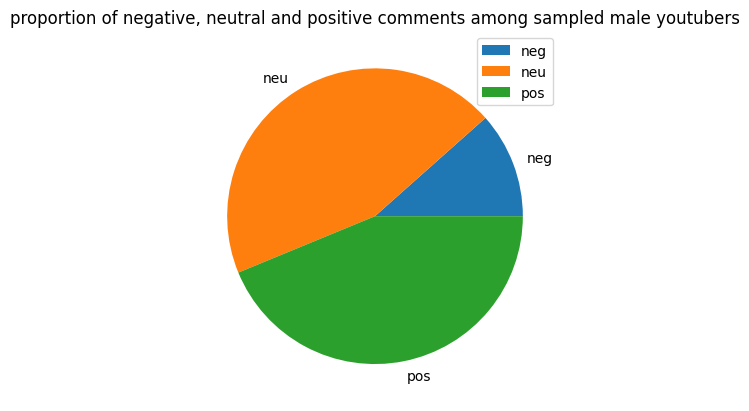

In [43]:
male_emo_ct.plot(y = 'Youtuber', 
                 ylabel = '',
                 kind = 'pie', 
                 title = 'proportion of negative, neutral and positive comments among sampled male youtubers')


<Axes: title={'center': 'proportion of negative, neutral and positive comments among sampled female youtubers'}>

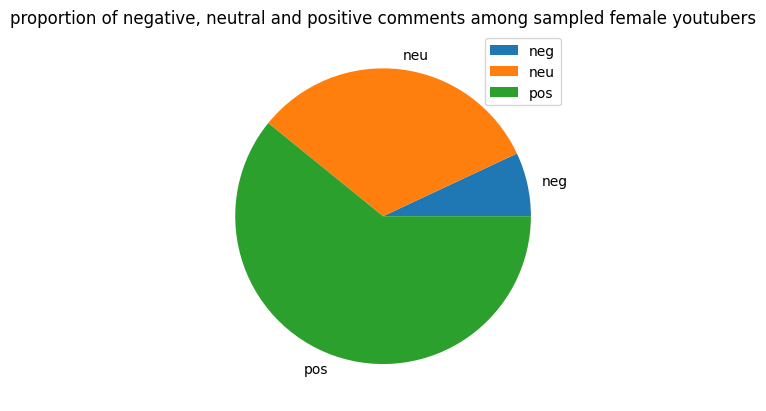

In [44]:
female_emo_ct.plot(y = 'Youtuber', 
                   ylabel = '',
                   kind = 'pie', 
                   title = "proportion of negative, neutral and positive comments among sampled female youtubers")

## Null Hypothesis (H0):
There is no association between gender and sentiment category in the comments on YouTube videos.

## Alternative Hypothesis (Ha):
There is an association between gender and sentiment category in the comments on YouTube videos.

In [45]:
male_emo_ct

,Youtuber,Comments,Word Count,Char Length,Polarity Scores,youtuber,sex
Emotion,,,,,,,
neg,354,354,354,354,354,354,354
neu,1366,1364,1366,1366,1366,1366,1366
pos,1339,1339,1339,1339,1339,1339,1339


In [46]:
female_emo_ct

,Youtuber,Comments,Word Count,Char Length,Polarity Scores,youtuber,sex
Emotion,,,,,,,
neg,260,260,260,260,260,260,260
neu,1200,1194,1200,1200,1200,1200,1200
pos,2269,2269,2269,2269,2269,2269,2269


In [47]:
m_val = male_emo_ct.get('Youtuber').values
f_val = female_emo_ct.get('Youtuber').values

In [48]:
m_val

array([ 354, 1366, 1339])

In [49]:
chi_data = {'M': m_val, 'F': f_val}

In [50]:
# create contingency table
cont_table = pd.DataFrame(chi_data).T
cont_table = cont_table.reset_index().rename(columns = {'index':'Gender', 
                                                        0: 'Negative', 
                                                        1: 'Neutral', 
                                                        2: 'Positive'})
cont_table = cont_table.set_index('Gender')
cont_table

,Negative,Neutral,Positive
Gender,,,
M,354,1366,1339
F,260,1200,2269


In [51]:
chi2, p, dof, expected = chi2_contingency(cont_table)

In [52]:
print(f"Chi-Squared: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected frequencies:")
print(expected)

Chi-Squared: 200.67067311235925
P-value: 2.660216566769837e-44
Degrees of Freedom: 2
Expected frequencies:
[[ 276.69799646 1156.36328816 1625.93871538]
 [ 337.30200354 1409.63671184 1982.06128462]]


The small p-value suggests that the association between gender and sentiment categories in the comments is statistically significant.

## NLP EDA

In [53]:
male

,Youtuber,Comments,Word Count,Char Length,Polarity Scores,Emotion,youtuber,sex
0,mrbeast gaming,subscribe i’ll put raining arrows minecraft se...,7,50,"{'roberta_neg': 0.043050993, 'roberta_neu': 0....",neu,mrbeast gaming,M
1,mrbeast gaming,jimmy raging possibly one scariest things i’ve...,13,81,"{'roberta_neg': 0.72986925, 'roberta_neu': 0.2...",neg,mrbeast gaming,M
2,mrbeast gaming,like video jimmy laughing everyone else,6,39,"{'roberta_neg': 0.048514094, 'roberta_neu': 0....",neu,mrbeast gaming,M
3,mrbeast gaming,like chandler waits start let’s jimmy die 3 ti...,12,67,"{'roberta_neg': 0.5986172, 'roberta_neu': 0.36...",neg,mrbeast gaming,M
4,mrbeast gaming,watching jimmy rage funniest thing i39ve ever ...,14,86,"{'roberta_neg': 0.00713156, 'roberta_neu': 0.1...",pos,mrbeast gaming,M
...,...,...,...,...,...,...,...,...
3054,georgenotfound,love george’s videos like end actually winning...,9,59,"{'roberta_neg': 0.008147895, 'roberta_neu': 0....",pos,georgenotfound,M
3055,georgenotfound,damn rly whole challenge could’ve closed eyes smh,8,49,"{'roberta_neg': 0.72874755, 'roberta_neu': 0.2...",neg,georgenotfound,M
3056,georgenotfound,anyone realize george good coder,5,32,"{'roberta_neg': 0.015506589, 'roberta_neu': 0....",pos,georgenotfound,M
3057,georgenotfound,alternate title “minecraft i’m medusa”,5,38,"{'roberta_neg': 0.067195676, 'roberta_neu': 0....",neu,georgenotfound,M


In [54]:
male_text = male.get('Comments').values

In [60]:
stopwords = set(STOPWORDS)

In [57]:
comment_words = ''

In [58]:
for val in male_text:
    val = str(val)
    tokens = val.split()
    
        
    comment_words += ' '.join(tokens) + ' '
    
    

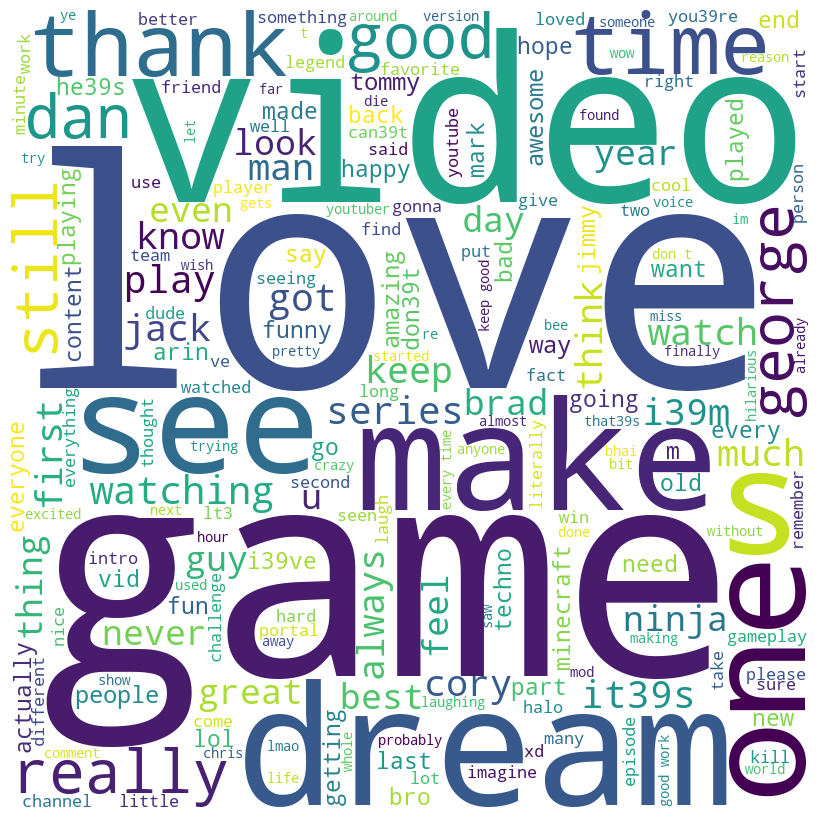

In [64]:
wordcloud = WordCloud(width = 800, height = 800,
                     background_color = 'white',
                     stopwords = stopwords,
                     min_font_size = 10).generate(comment_words)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

In [63]:
comment_text = " ".join(male_text)

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(comment_text)

TypeError: sequence item 626: expected str instance, float found